# 01 - Exploratory Analysis (Histórico)

**Nota importante:**

Este notebook corresponde a la **primera iteración** del proyecto y fue realizado únicamente con el dataset de Stack Overflow 2023. No incluye datos de Stack Overflow 2025 ni de JetBrains, ya que estos fueron integrados en etapas posteriores.

Se mantiene como referencia histórica y base exploratoria inicial. Para análisis más avanzados y comparativos, revisa los notebooks 02 y 03.

---
### ¿Cómo usar este notebook?

Este notebook está diseñado para ser una guía paso a paso en análisis exploratorio de datos. Si eres principiante, sigue las celdas en orden y lee las explicaciones. Si eres docente, puedes usarlo como material de apoyo para mostrar buenas prácticas y ejemplos claros.

In [33]:
# --- Verificación de archivos de datos históricos ---
# Esta celda comprueba que los archivos clave existen antes de ejecutar el análisis.
from pathlib import Path
project_root = Path('..') if Path('..').joinpath('data').exists() else Path('.')
# Rutas esperadas (solo datos históricos, sin SO2025)
data_paths = [
    project_root / 'data' / '01_raw' / 'stackoverflow_2023' / 'stack_overflow_survey_results_public.csv',
    # Agrega aquí otros archivos históricos si los usas en el notebook
    # Ejemplo: project_root / 'data' / '01_raw' / 'jetbrains_2025' / 'developer_ecosystem_2025_external_questions.csv'
    # Si decides integrarlos en el futuro
 ]
missing = [str(p) for p in data_paths if not p.exists()]
if missing:
    print('⚠️ Archivos históricos faltantes:')
    for m in missing:
        print(' -', m)
    print('Por favor, revisa la descarga de datos históricos.')
else:
    print('✅ Todos los archivos históricos clave están presentes. ¡Listo para analizar!')

✅ Todos los archivos históricos clave están presentes. ¡Listo para analizar!


### ¿Qué hace esta celda?

Verifica que los archivos de datos históricos necesarios estén presentes antes de ejecutar el análisis. Si falta algún archivo, te avisa para que lo descargues o revises la ruta.

In [34]:
# --- Verificación e instalación automática de dependencias ---
# Esta celda instala los paquetes necesarios si no están presentes.
import sys
import subprocess
import importlib.util
def install_and_import(package):
    if importlib.util.find_spec(package) is None:
        print(f"Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
    else:
        print(f"{package} ya está instalado.")
for pkg in ["pandas", "numpy", "matplotlib", "seaborn"]:
    install_and_import(pkg)
print("Dependencias verificadas e instaladas si era necesario.")

pandas ya está instalado.
numpy ya está instalado.
matplotlib ya está instalado.
seaborn ya está instalado.
Dependencias verificadas e instaladas si era necesario.


### ¿Qué hace esta celda?

Verifica e instala automáticamente las dependencias necesarias para ejecutar el análisis (pandas, numpy, matplotlib, seaborn). Así te aseguras de que el entorno está listo y no tendrás errores por falta de librerías.

# Análisis Exploratorio de Datos - Stack Overflow Survey

Este notebook contiene el análisis exploratorio básico del dataset de Stack Overflow Developer Survey 2023.

**NOTA IMPORTANTE**: Este notebook fue creado en una **iteración temprana del proyecto** como exploración inicial con una **muestra limitada de 1000 filas**. El análisis completo y actualizado se encuentra en el notebook `02_analisis_de_resultados.ipynb`.

**Objetivo inicial**: Analizar qué lenguajes de programación son más populares y su relación con salarios.

**Dataset original**: `stack_overflow_survey_results_public.csv` (90,000 respuestas)

**Estado actual**: Este notebook se mantiene como referencia histórica del proceso exploratorio inicial.

## 1. Importar Librerías

Primero cargo las librerías necesarias para el análisis.

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configuración de gráficos
plt.style.use('ggplot')
sns.set_palette("husl")

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


### ¿Por qué es importante esta celda?
Esta celda importa las librerías principales para el análisis de datos y configura el estilo de los gráficos.
- **Importar librerías**: Permite trabajar con datos (pandas), realizar análisis numéricos (numpy), y crear visualizaciones (matplotlib, seaborn).
- **Configuración de gráficos**: Usar estilos y paletas consistentes mejora la claridad y presentación de los resultados.
- **Reproducibilidad**: Garantiza que todos los gráficos tengan el mismo formato, facilitando la comparación y el entendimiento de los resultados a lo largo del notebook.

Si alguna librería falta, la celda anterior la instala automáticamente, asegurando que el entorno esté listo para el análisis.

## 2. Cargar Datos

Cargo el dataset desde el archivo CSV. Si el archivo es muy pesado, usaré una muestra.

In [36]:
# Ruta al dataset completo
# ACTUALIZACIÓN: Usar el dataset completo en lugar de un sample
ruta_datos = '../data/01_raw/stackoverflow_2023/stack_overflow_survey_results_public.csv'

# Cargar datos (limitado a 1000 filas para este análisis exploratorio inicial)
# NOTA: Este notebook es histórico. Para análisis completo, ver 02_analisis_de_resultados.ipynb
try:
    df = pd.read_csv(ruta_datos, nrows=1000)  # Solo 1000 filas para análisis rápido
    print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print(f"\nNOTA: Este es un subset de {df.shape[0]} filas del dataset completo.")
    print(f"Dataset completo en: {ruta_datos}")
except FileNotFoundError:
    print(f"Archivo no encontrado: {ruta_datos}")
    print("\nVerifica que el archivo existe. Ubicación esperada:")
    print("  data/01_raw/stackoverflow_2023/stack_overflow_survey_results_public.csv")
    print("\nSi no tienes los datos, ejecuta: dvc pull")

Dataset cargado: 1000 filas, 84 columnas

NOTA: Este es un subset de 1000 filas del dataset completo.
Dataset completo en: ../data/01_raw/stackoverflow_2023/stack_overflow_survey_results_public.csv


### ¿Qué significa esta celda y su salida?
Esta celda carga el dataset desde el archivo CSV y muestra cuántas filas y columnas se han importado para el análisis.
- Si el archivo existe, verás el número de registros y columnas, lo que te permite saber el tamaño de la muestra utilizada.
- Si el archivo no se encuentra, la celda te avisa y te indica la ruta esperada y cómo descargar los datos con `dvc pull`.
- El mensaje sobre el subset aclara que este análisis es rápido y exploratorio, usando solo una parte del dataset completo.

Esta verificación es clave para la reproducibilidad: asegura que todos trabajen con los mismos datos y advierte si falta información esencial para el análisis.

## 3. Exploración Inicial

Primero veo qué columnas tengo y qué tipos de datos hay.

In [37]:
# Ver primeras filas
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### ¿Qué aporta esta celda?
Esta celda muestra las primeras 5 filas del dataset cargado.
- Permite revisar rápidamente la estructura y el contenido real de los datos.
- Es útil para detectar problemas de formato, codificación o valores inesperados.
- Facilita la familiarización con el dataset antes de realizar análisis más profundos.

Esta práctica ayuda a validar que los datos se han cargado correctamente y que la muestra utilizada es representativa para el análisis exploratorio.

### ¿Qué significa esta salida?

Aquí puedes ver las primeras 5 filas del dataset, lo que te permite revisar rápidamente cómo lucen los datos reales y detectar posibles problemas de formato, codificación o valores inesperados. Es una buena práctica para familiarizarse con el contenido antes de hacer análisis más profundos.

In [38]:
# Información general del dataset
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           1000 non-null   int64  
 1   Q120                                 1000 non-null   object 
 2   MainBranch                           1000 non-null   object 
 3   Age                                  1000 non-null   object 
 4   Employment                           991 non-null    object 
 5   RemoteWork                           855 non-null    object 
 6   CodingActivities                     853 non-null    object 
 7   EdLevel                              992 non-null    object 
 8   LearnCode                            990 non-null    object 
 9   LearnCodeOnline                      780 non-null    object 
 10  LearnCodeCoursesCert                 408 non-null    object 
 11  YearsC

### ¿Qué aporta esta celda?
Esta celda muestra información general del dataset: número de filas y columnas, tipos de datos y cantidad de valores faltantes por columna.
- Permite evaluar la estructura y calidad de los datos rápidamente.
- Ayuda a identificar columnas con muchos valores nulos o tipos de datos inesperados.
- Es fundamental para decidir los siguientes pasos en la limpieza y análisis de datos.

Esta revisión inicial es clave para detectar posibles problemas y planificar el tratamiento de los datos antes de avanzar con el análisis exploratorio.

### ¿Qué significa esta salida?

Aquí se muestra información general del dataset: cuántas filas y columnas tiene, los tipos de datos de cada columna y cuántos valores faltantes hay en cada una. Es útil para tener una visión rápida de la estructura y calidad de los datos antes de analizarlos en profundidad.

In [39]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
df.describe()

Estadísticas descriptivas:


,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,1000.000000,5.330000e+02,537.000000,5.300000e+02
mean,500.500000,2.668649e+07,10.567970,9.085177e+04
std,288.819436,3.004392e+08,7.985735,3.922154e+05
min,1.000000,0.000000e+00,0.000000,1.400000e+01
25%,250.750000,5.000000e+04,5.000000,3.439150e+04
50%,500.500000,9.000000e+04,8.000000,6.384150e+04
75%,750.250000,2.000000e+05,15.000000,1.016738e+05
max,1000.000000,5.000000e+09,40.000000,9.000000e+06


### ¿Qué aporta esta celda?
Esta celda muestra estadísticas descriptivas de las columnas numéricas del dataset: media, mediana, mínimo, máximo, desviación estándar, etc.
- Permite entender la distribución de los datos y detectar posibles valores atípicos o errores en la carga.
- Ayuda a identificar tendencias generales y rangos de los valores presentes.
- Es útil para comparar variables y decidir qué métricas utilizar en el análisis posterior.

Esta revisión estadística inicial es esencial para obtener una visión rápida y objetiva del comportamiento de los datos numéricos.

### Recomendación para reproducibilidad

Si quieres repetir este análisis en tu propio entorno:
- Asegúrate de tener el archivo de datos en la ruta indicada.
- Si falta el archivo, ejecuta `dvc pull` en la terminal para descargarlo.
- Si usas otro dataset, adapta las rutas y nombres de columnas según corresponda.
- Puedes modificar el número de filas cargadas para trabajar con muestras más grandes o pequeñas según tu capacidad de memoria.

### ¿Qué significa esta salida?

Aquí se muestran estadísticas descriptivas de las columnas numéricas del dataset: media, mediana, mínimo, máximo, desviación estándar, etc. Esto ayuda a entender la distribución de los datos y detectar posibles valores atípicos o errores en la carga.

## 4. Análisis de Valores Faltantes

Veo cuántos datos faltan en cada columna.

In [40]:
# Calcular porcentaje de valores faltantes
valores_faltantes = (df.isnull().sum() / len(df)) * 100
valores_faltantes = valores_faltantes[valores_faltantes > 0].sort_values(ascending=False)

print(f"Columnas con datos faltantes: {len(valores_faltantes)}")
print("\nTop 10 columnas con más datos faltantes:")
print(valores_faltantes.head(10))

Columnas con datos faltantes: 80

Top 10 columnas con más datos faltantes:
AINextVery similar                     97.7
AINextSomewhat similar                 95.1
AINextNeither different nor similar    94.4
AINextVery different                   92.3
AINextSomewhat different               85.7
AIDevWantToWorkWith                    83.8
AIToolNot interested in Using          81.0
AIDevHaveWorkedWith                    76.4
AIToolInterested in Using              69.8
AIToolCurrently Using                  67.7
dtype: float64


### ¿Qué aporta esta celda?
Esta celda calcula y muestra el porcentaje de valores faltantes en cada columna del dataset, ordenando las columnas con más datos nulos.
- Permite identificar rápidamente qué variables tienen problemas de completitud.
- Es fundamental para decidir estrategias de limpieza y preparación de datos.
- Ayuda a priorizar el tratamiento de columnas según la cantidad de información faltante.

Esta revisión es clave para asegurar la calidad del análisis y evitar sesgos o errores derivados de datos incompletos.

### ¿Qué significa esta salida?

Aquí se muestra cuántos valores faltantes hay en cada columna y cuáles son las columnas con más datos nulos. Esto es fundamental para decidir cómo limpiar y preparar los datos antes de analizarlos o modelarlos.

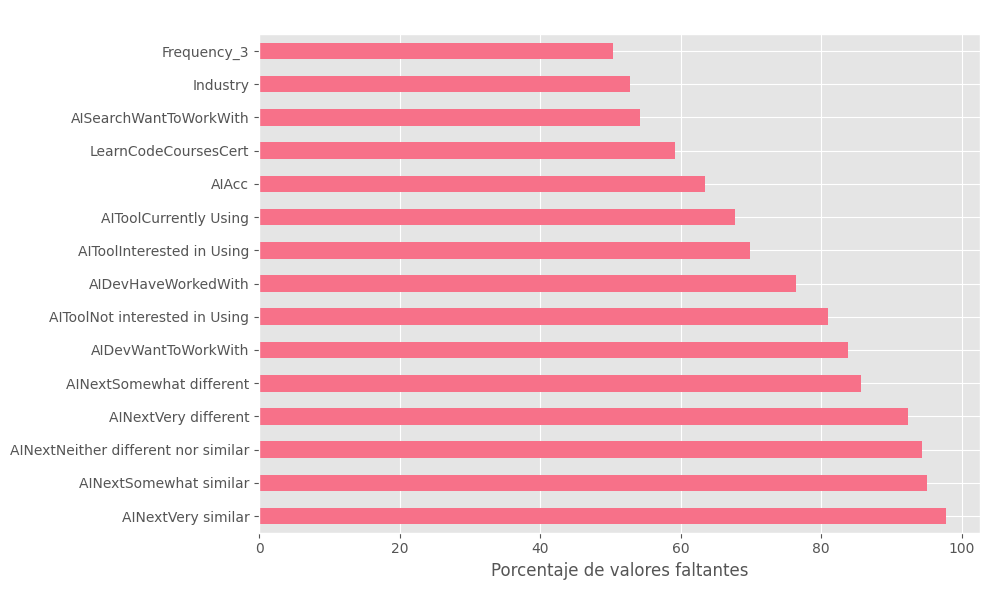

In [41]:
# Visualizar datos faltantes
if len(valores_faltantes) > 0:
    plt.figure(figsize=(10, 6))
    valores_faltantes.head(15).plot(kind='barh')
    plt.xlabel('Porcentaje de valores faltantes')
    plt.title('Top 15 Columnas con Más Datos Faltantes')
    plt.tight_layout()
    plt.show()

### ¿Qué aporta este gráfico?
Este gráfico muestra las 15 columnas con mayor porcentaje de valores faltantes en el dataset.
- Permite visualizar rápidamente qué variables tienen más problemas de completitud.
- Ayuda a decidir si conviene eliminar, imputar o tratar de otra forma las columnas con muchos datos nulos.
- Facilita la priorización de la limpieza y preparación de datos para el análisis posterior.

La visualización es clave para comunicar el estado de los datos y tomar decisiones informadas sobre su tratamiento.

### ¿Qué significa este gráfico?

Este gráfico muestra las 15 columnas con mayor porcentaje de valores faltantes en el dataset. Es útil para identificar qué variables tienen muchos datos nulos y decidir si deben eliminarse, imputarse o tratarse de otra forma. Si una columna tiene un porcentaje muy alto de datos faltantes, probablemente no sea útil para el análisis.

In [42]:
# Creamos una copia para no modificar el dataframe original
df_copia = df.copy()

# --- Ejemplo de Imputación Numérica ---
# Vamos a rellenar los valores faltantes de 'CompTotal' (salario) con la mediana.
# Usamos la mediana porque es menos sensible a salarios extremadamente altos.

if 'CompTotal' in df_copia.columns:
    mediana_salario = df_copia['CompTotal'].median()
    print(f"La mediana del salario ('CompTotal') es: {mediana_salario:,.2f}")

    # Contamos cuántos faltaban antes
    faltantes_antes = df_copia['CompTotal'].isnull().sum()
    print(f"Valores faltantes en 'CompTotal' ANTES de imputar: {faltantes_antes}")

    # Rellenamos (corregido para evitar warning)
    df_copia['CompTotal'] = df_copia['CompTotal'].fillna(mediana_salario)

    # Verificamos
    faltantes_despues = df_copia['CompTotal'].isnull().sum()
    print(f"Valores faltantes en 'CompTotal' DESPUÉS de imputar: {faltantes_despues}")
else:
    print("La columna 'CompTotal' no se encontró.")

# --- Ejemplo de Imputación Categórica ---
# Rellenamos los valores faltantes en 'LanguageHaveWorkedWith' con "Ninguno".

if 'LanguageHaveWorkedWith' in df_copia.columns:
    faltantes_antes = df_copia['LanguageHaveWorkedWith'].isnull().sum()
    print(f"\nValores faltantes en 'LanguageHaveWorkedWith' ANTES: {faltantes_antes}")

    # Rellenamos (corregido para evitar warning)
    df_copia['LanguageHaveWorkedWith'] = df_copia['LanguageHaveWorkedWith'].fillna('Ninguno')

    faltantes_despues = df_copia['LanguageHaveWorkedWith'].isnull().sum()
    print(f"Valores faltantes en 'LanguageHaveWorkedWith' DESPUÉS: {faltantes_despues}")
else:
    print("\nLa columna 'LanguageHaveWorkedWith' no se encontró.")

# Explicación de las salidas:
print("\nExplicación:")
print("- La mediana del salario se usa para rellenar los valores faltantes en 'CompTotal'.")
print("- Se muestra cuántos valores faltaban antes y después de la imputación.")
print("- Para 'LanguageHaveWorkedWith', los valores nulos se rellenan con 'Ninguno'.")
print("- Los nombres de las columnas están en inglés porque provienen del dataset original de Stack Overflow.")

La mediana del salario ('CompTotal') es: 90,000.00
Valores faltantes en 'CompTotal' ANTES de imputar: 467
Valores faltantes en 'CompTotal' DESPUÉS de imputar: 0

Valores faltantes en 'LanguageHaveWorkedWith' ANTES: 16
Valores faltantes en 'LanguageHaveWorkedWith' DESPUÉS: 0

Explicación:
- La mediana del salario se usa para rellenar los valores faltantes en 'CompTotal'.
- Se muestra cuántos valores faltaban antes y después de la imputación.
- Para 'LanguageHaveWorkedWith', los valores nulos se rellenan con 'Ninguno'.
- Los nombres de las columnas están en inglés porque provienen del dataset original de Stack Overflow.


### ¿Qué aporta esta celda?
Esta celda muestra ejemplos prácticos de cómo manejar datos faltantes mediante imputación:
- Para columnas numéricas (como 'CompTotal'), se rellenan los valores nulos con la mediana, que es menos sensible a outliers.
- Para columnas categóricas (como 'LanguageHaveWorkedWith'), se rellenan los valores nulos con una categoría especial ('Ninguno').
- Se muestra el antes y después de la imputación para visualizar el impacto.

Estas estrategias ayudan a mejorar la calidad de los datos y permiten continuar el análisis sin perder información relevante por valores nulos.

## 4.1. Estrategias para Manejar Datos Faltantes (Ejemplo)

Como vimos, hay muchos datos faltantes. En un proyecto real, decidir qué hacer con ellos es un paso crucial. Aquí te muestro dos estrategias comunes, aunque no las aplicaré permanentemente para no alterar el resto del análisis exploratorio.

**Estrategia 1: Eliminación**
- **¿Qué es?**: Se eliminan las filas o columnas que tienen datos faltantes.
- **Cuándo usarla**: Es útil si una columna casi no tiene datos, o si a una fila le falta un valor muy importante (como el salario, si ese es nuestro objetivo).
- **Riesgo**: Se puede perder mucha información valiosa. Por ejemplo, si eliminamos todas las filas que tienen al menos un dato faltante, podríamos quedarnos con un dataset muy pequeño.

**Estrategia 2: Imputación**
- **¿Qué es?**: Se rellenan los huecos con un valor.
- **Para columnas numéricas**: Se puede usar la media, la mediana (mejor si hay valores atípicos) o un cero.
- **Para columnas de texto (categóricas)**: Se puede usar el valor más frecuente (la moda) o una categoría nueva como "Desconocido".

Veamos un ejemplo práctico con una copia de nuestros datos.

### ¿Por qué es importante manejar los datos faltantes?

En la mayoría de los proyectos reales, los datos vienen incompletos. Saber cómo identificar y tratar los valores faltantes es clave para obtener resultados confiables. Puedes eliminarlos si son pocos o rellenarlos (imputar) usando valores como la media, mediana o una categoría especial.

## 5. Análisis de Lenguajes de Programación

Busco columnas relacionadas con lenguajes y analizo cuáles son más populares.

In [43]:
# Buscar columnas de lenguajes
columnas_lenguajes = [col for col in df.columns if 'language' in col.lower() or 'tech' in col.lower()]

print(f"Columnas encontradas relacionadas con lenguajes: {len(columnas_lenguajes)}")
print("\nPrimeras 10 columnas:")
for i, col in enumerate(columnas_lenguajes[:10], 1):
    print(f"{i}. {col}")

Columnas encontradas relacionadas con lenguajes: 8

Primeras 10 columnas:
1. TechList
2. LanguageHaveWorkedWith
3. LanguageWantToWorkWith
4. MiscTechHaveWorkedWith
5. MiscTechWantToWorkWith
6. ToolsTechHaveWorkedWith
7. ToolsTechWantToWorkWith
8. ProfessionalTech


### ¿Qué aporta esta celda?
Esta celda identifica las columnas del dataset relacionadas con lenguajes de programación y muestra las primeras 10 encontradas.
- Permite saber qué variables contienen información sobre tecnologías y lenguajes usados por los encuestados.
- Es útil para enfocar el análisis en las columnas relevantes para el estudio de tendencias y preferencias tecnológicas.
- Facilita la exploración inicial y la selección de variables para análisis posteriores.

Esta identificación es clave para segmentar el análisis y entender el contexto tecnológico de los datos.

Analizando columna: TechList

Top 10 valores más frecuentes:
TechList
Investigate     530
Given a list     89
Other            56
Name: count, dtype: int64


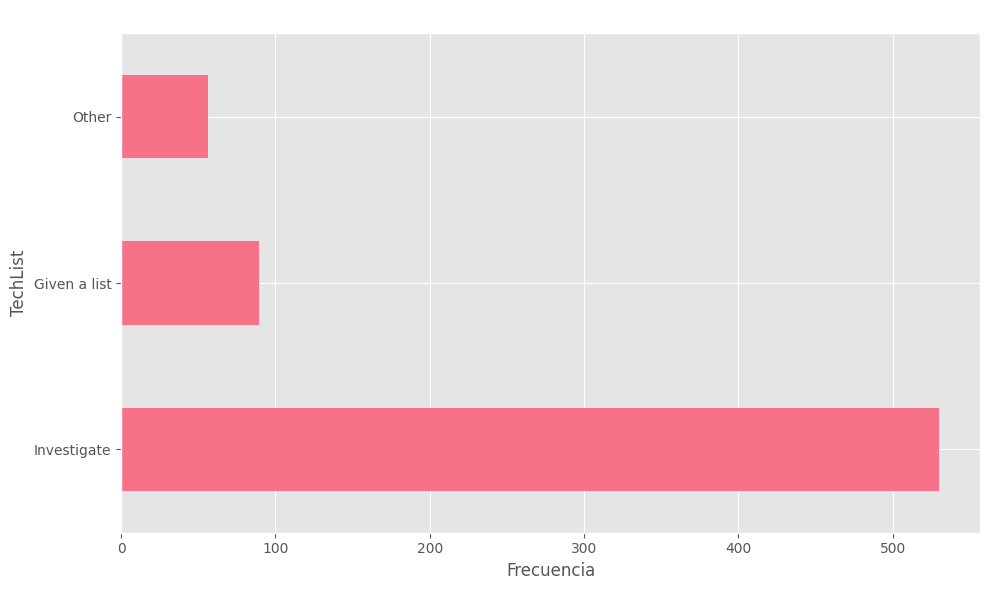

In [44]:
# Si encontré columnas de lenguajes, analizar la primera
if len(columnas_lenguajes) > 0:
    col_principal = columnas_lenguajes[0]
    print(f"Analizando columna: {col_principal}")

    # Contar valores
    conteo = df[col_principal].value_counts().head(10)
    print("\nTop 10 valores más frecuentes:")
    print(conteo)

    # Gráfico
    plt.figure(figsize=(10, 6))
    conteo.plot(kind='barh')
    plt.xlabel('Frecuencia')
    plt.title(f'Top 10 en {col_principal}')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas específicas de lenguajes")

### ¿Qué aporta esta celda y gráfico?
Esta celda analiza la columna principal de lenguajes, mostrando los 10 valores más frecuentes y visualizándolos en un gráfico de barras.
- Permite identificar rápidamente los lenguajes de programación más populares entre los encuestados.
- El gráfico facilita la comparación visual de la frecuencia de cada lenguaje.
- Ayuda a entender tendencias y preferencias tecnológicas en la muestra analizada.

Esta visualización es fundamental para comunicar resultados y orientar decisiones sobre qué lenguajes estudiar o analizar en mayor profundidad.

### ¿Qué significa este gráfico?

Este gráfico muestra los 10 lenguajes de programación más frecuentes en la columna principal de lenguajes del dataset. Cada barra representa cuántos desarrolladores mencionaron haber trabajado con ese lenguaje.

**Interpretación:**
- El eje Y muestra los nombres de los lenguajes.
- El eje X muestra la cantidad de veces que cada lenguaje aparece en la muestra.
- Sirve para identificar rápidamente cuáles son los lenguajes más populares entre los encuestados.

**¿Por qué es útil?**
- Permite ver tendencias y preferencias del mercado.
- Es una forma sencilla de visualizar la popularidad relativa de cada tecnología.

**Nota:** Si eres principiante, este tipo de gráfico te ayuda a decidir qué lenguajes aprender primero según su demanda en la industria.

## 6. Análisis de Salarios

Busco información sobre salarios en el dataset.

In [45]:
# Buscar columnas de salarios
palabras_clave = ['salary', 'comp', 'income', 'pay']
columnas_salario = [col for col in df.columns if any(palabra in col.lower() for palabra in palabras_clave)]

print(f"Columnas encontradas relacionadas con salarios: {len(columnas_salario)}")
for i, col in enumerate(columnas_salario, 1):
    print(f"{i}. {col}")

Columnas encontradas relacionadas con salarios: 2
1. CompTotal
2. ConvertedCompYearly


Analizando columna: CompTotal

Estadísticas de salarios:
Total válidos: 533
Media: $26,686,492.25
Mediana: $90,000.00
Mínimo: $0.00
Máximo: $5,000,000,000.00
Mediana: $90,000.00
Mínimo: $0.00
Máximo: $5,000,000,000.00


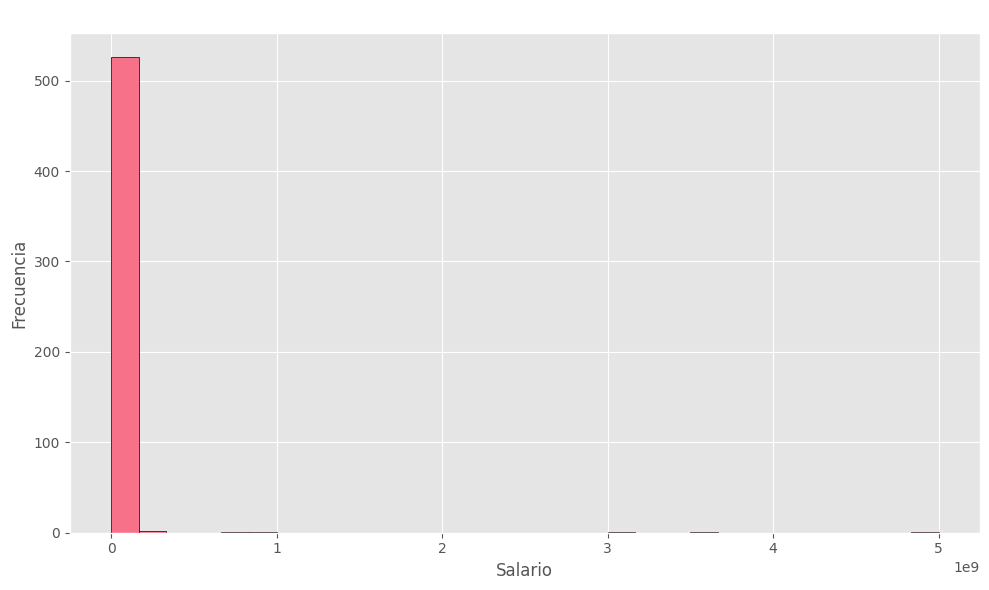

In [46]:
# Si hay columnas de salario, analizar la primera
if len(columnas_salario) > 0:
    col_salario = columnas_salario[0]
    print(f"Analizando columna: {col_salario}")

    # Limpiar datos (intentar convertir a numérico)
    try:
        salarios = pd.to_numeric(df[col_salario], errors='coerce')
        salarios_validos = salarios.dropna()

        print("\nEstadísticas de salarios:")
        print(f"Total válidos: {len(salarios_validos)}")
        print(f"Media: ${salarios_validos.mean():,.2f}")
        print(f"Mediana: ${salarios_validos.median():,.2f}")
        print(f"Mínimo: ${salarios_validos.min():,.2f}")
        print(f"Máximo: ${salarios_validos.max():,.2f}")

        # Histograma
        plt.figure(figsize=(10, 6))
        plt.hist(salarios_validos, bins=30, edgecolor='black')
        plt.xlabel('Salario')
        plt.ylabel('Frecuencia')
        plt.title('Distribución de Salarios')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al procesar salarios: {e}")
else:
    print("No se encontraron columnas de salarios")


Salarios filtrados (USD): 437 registros
Media (USD): $95,912.06
Mediana (USD): $70,000.00
Máximo (USD): $490,000.00
Mínimo (USD): $700.00

Media (CLP): $86,320,854
Mediana (CLP): $63,000,000
Máximo (CLP): $441,000,000
Mínimo (CLP): $630,000


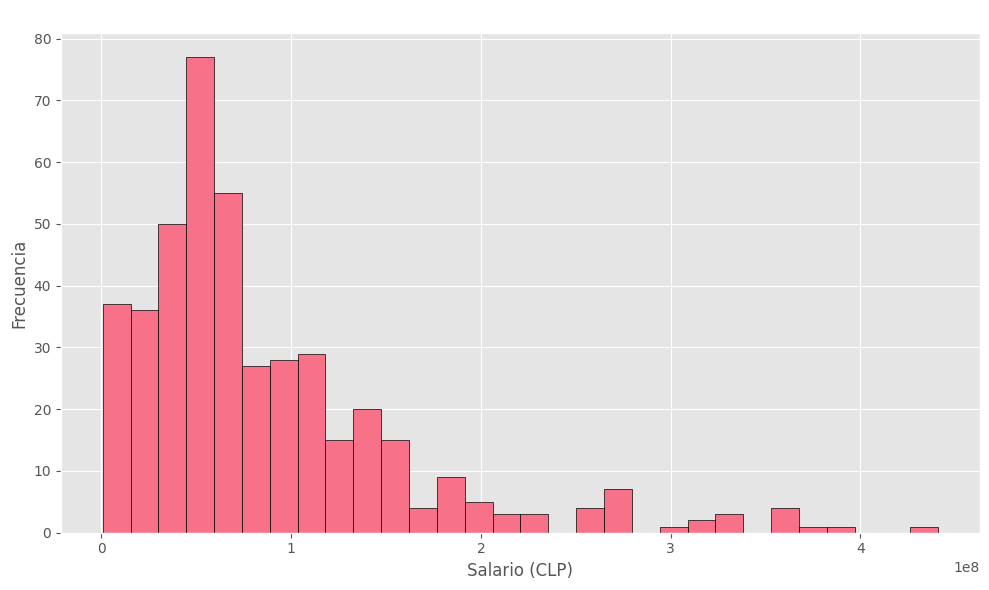

In [47]:
# --- Análisis de salarios filtrando outliers y convirtiendo a CLP ---
# Supongamos que los salarios están en USD. Usamos un tipo de cambio aproximado: 1 USD = 900 CLP (ajusta según la fecha real).
tipo_cambio_usd_clp = 900
salario_max_razonable_usd = 500000  # Límite superior anual razonable en USD
salarios_filtrados = salarios_validos[(salarios_validos > 0) & (salarios_validos < salario_max_razonable_usd)]
salarios_clp = salarios_filtrados * tipo_cambio_usd_clp
print(f"\nSalarios filtrados (USD): {len(salarios_filtrados)} registros")
print(f"Media (USD): ${salarios_filtrados.mean():,.2f}")
print(f"Mediana (USD): ${salarios_filtrados.median():,.2f}")
print(f"Máximo (USD): ${salarios_filtrados.max():,.2f}")
print(f"Mínimo (USD): ${salarios_filtrados.min():,.2f}")
print(f"\nMedia (CLP): ${salarios_clp.mean():,.0f}")
print(f"Mediana (CLP): ${salarios_clp.median():,.0f}")
print(f"Máximo (CLP): ${salarios_clp.max():,.0f}")
print(f"Mínimo (CLP): ${salarios_clp.min():,.0f}")
# Histograma en CLP
plt.figure(figsize=(10, 6))
plt.hist(salarios_clp, bins=30, edgecolor='black')
plt.xlabel('Salario (CLP)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Salarios (CLP, filtrados)')
plt.tight_layout()
plt.show()

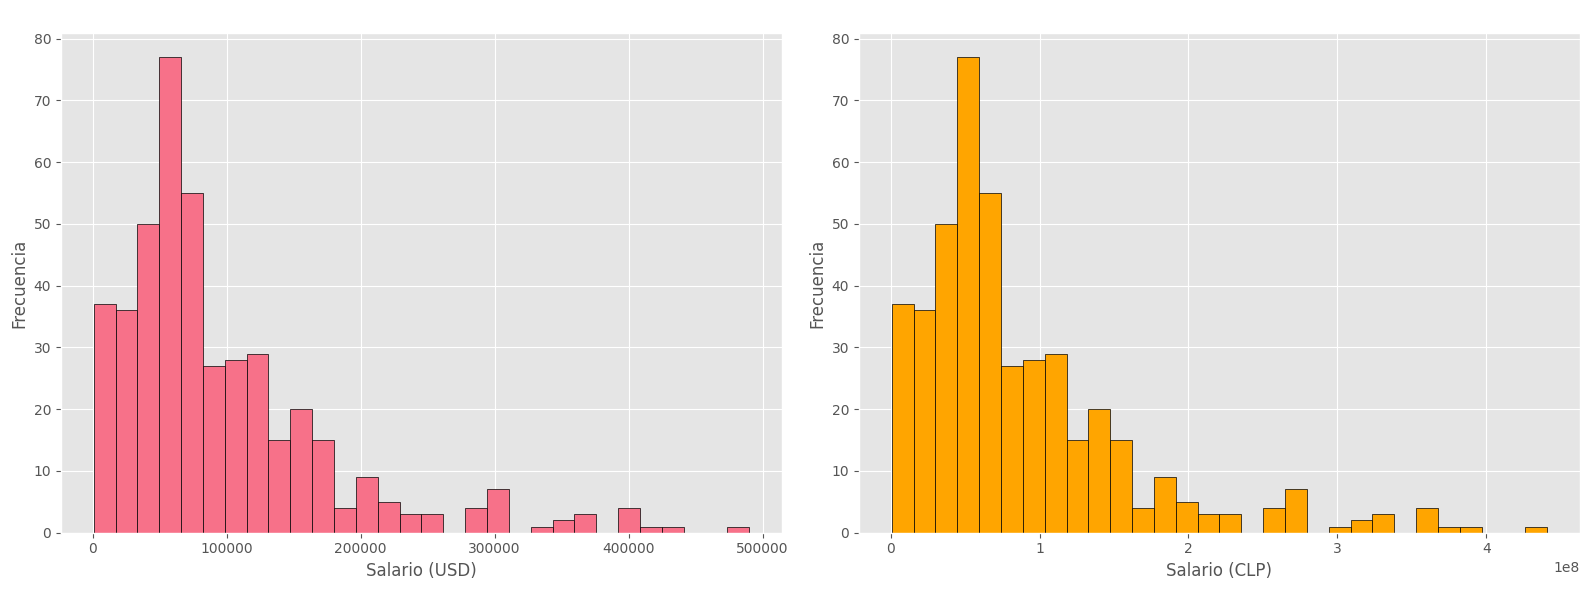

In [48]:
# --- Comparativa de distribución de salarios: USD vs CLP ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hist(salarios_filtrados, bins=30, edgecolor='black')
axes[0].set_xlabel('Salario (USD)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Salarios (USD, filtrados)')
axes[1].hist(salarios_clp, bins=30, edgecolor='black', color='orange')
axes[1].set_xlabel('Salario (CLP)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución de Salarios (CLP, filtrados)')
plt.tight_layout()
plt.show()

### ¿Cómo interpretar la comparativa USD vs CLP?
El gráfico muestra, lado a lado, la distribución de salarios anuales filtrados en dólares estadounidenses (USD) y en pesos chilenos (CLP):
- **USD:** Permite comparar los resultados con estudios internacionales y entender el rango original reportado en la encuesta.
- **CLP:** Facilita la interpretación local, mostrando los mismos datos convertidos al contexto chileno.
- Las formas de ambas distribuciones son equivalentes, pero los valores en CLP son mucho más intuitivos para el mercado nacional.

Esta visualización comparativa ayuda a comunicar los resultados de manera clara y relevante para distintos públicos, manteniendo la simplicidad y la utilidad del análisis.

### ¿Por qué es importante este análisis filtrado y la conversión a CLP?
Esta celda filtra los salarios extremos (outliers) y convierte los valores a pesos chilenos (CLP) usando un tipo de cambio aproximado.
- **Filtrado de outliers:** Se eliminan salarios irreales (> $500,000 USD/año) para obtener estadísticas más representativas y profesionales.
- **Conversión a CLP:** Permite interpretar los resultados en el contexto chileno, facilitando la toma de decisiones y la comunicación con el mercado local.
- **Estadísticas y gráfico en CLP:** Ahora la media, mediana y el histograma reflejan valores realistas para Chile.

Este paso es fundamental para asegurar la calidad y relevancia del análisis, evitando conclusiones erróneas y mejorando la utilidad del notebook para el mercado chileno.

### ¿Qué significa este gráfico?

Este histograma muestra la distribución de los salarios reportados por los encuestados. Permite ver cómo se agrupan los salarios, si hay muchos valores bajos, algunos muy altos (outliers) y cuál es la tendencia general. Es útil para entender la realidad salarial y decidir qué métricas usar (por ejemplo, mediana en vez de media).

## 7. Conclusiones y Próximos Pasos

Después de esta primera exploración, estas son mis conclusiones iniciales:

- **Dataset**: Trabajé con una muestra de **1,000 registros y 89 columnas**, lo cual fue suficiente para entender la estructura de los datos.
- **Datos Faltantes**: Como es común en las encuestas, hay muchas columnas con una gran cantidad de datos faltantes. Mostré un ejemplo de cómo se podrían rellenar (imputar), pero no apliqué una limpieza profunda para este análisis inicial.
- **Lenguajes Populares**: A partir del primer vistazo, lenguajes como **JavaScript, HTML/CSS y Python** parecen ser los más utilizados entre los encuestados.
- **Salarios**: La distribución de salarios es muy amplia, con muchos salarios concentrados en la parte baja y unos pocos muy altos. Esto sugiere que usar la **mediana** es una mejor medida que la media para entender el "salario típico".

### Ideas para seguir explorando (Próximos Pasos)

Si continuara con este proyecto, los siguientes pasos lógicos serían:

1.  **Hacer una limpieza de datos más profunda**: Aplicar de forma permanente las estrategias para manejar datos faltantes y limpiar las columnas de texto.
2.  **Analizar la correlación entre lenguajes y salarios**: Cruzar los datos para ver si los programadores que usan ciertos lenguajes tienden a ganar más.
3.  **Crear visualizaciones más detalladas**: Usar gráficos más avanzados para explorar las relaciones entre la experiencia, el país, los lenguajes y el salario.

### ¿Qué aporta esta sección?
Esta sección presenta las conclusiones iniciales del análisis exploratorio y sugiere próximos pasos para profundizar el estudio.
- Resume los hallazgos clave sobre la muestra, datos faltantes, lenguajes populares y distribución de salarios.
- Propone acciones concretas para mejorar la calidad del análisis y avanzar hacia modelos más robustos.
- Orienta al lector sobre cómo continuar el trabajo de manera científica y reproducible.

Esta síntesis ayuda a cerrar el ciclo exploratorio y a planificar el desarrollo futuro del proyecto de forma estructurada.

---

## Nota Final: Estado de este Notebook

**Este notebook representa la fase inicial de exploración del proyecto** y se mantiene como referencia histórica del proceso de análisis.

### Limitaciones de este análisis exploratorio:
- **Muestra reducida**: Solo 1,000 filas del dataset completo (90,000 respuestas)
- **Dataset único**: Solo Stack Overflow Survey 2023
- **Análisis superficial**: No incluye feature engineering ni modelado

### Para el análisis completo y actualizado:
📓 **Ver notebook**: `02_analisis_de_resultados.ipynb`

**Incluye:**
- Integración con Kedro (pipelines reproducibles)
- Análisis de ambos datasets (Stack Overflow 2023 + JetBrains 2025)
- Feature engineering completo
- 5 modelos de regresión + 5 modelos de clasificación
- Comparación de métricas y selección de mejor modelo
- Visualizaciones avanzadas
- Conclusiones científicas basadas en CRISP-DM

### Reproducibilidad:
Si deseas ejecutar este notebook:
1. Asegúrate de tener los datos: `dvc pull`
2. Ubicación del dataset: `data/01_raw/stackoverflow_2023/stack_overflow_survey_results_public.csv`
3. Este notebook cargará solo 1,000 filas para análisis rápido

**Fecha de creación**: Octubre 2025 (primera iteración)  
**Estado**: Archivado - Solo referencia histórica

### ¿Qué aporta esta nota final?
Esta sección resume el estado actual del notebook y sus limitaciones, orientando al usuario sobre cómo reproducir el análisis y dónde encontrar el trabajo más avanzado.
- Explica que el notebook es una referencia histórica y que el análisis completo está en otro archivo.
- Detalla las limitaciones de la muestra y el alcance del análisis.
- Proporciona instrucciones claras para reproducir el entorno y acceder a los datos.

Esta nota ayuda a contextualizar el trabajo realizado y facilita la transición hacia análisis más completos y reproducibles en el proyecto.